# Making a new domain: `CStarSpecBuilder`

This notebook demonstrates how to create a new domain and run a ROMS simulation using C-SON Forge.


## Setup

First, import the necessary modules and define the domain configuration parameters.


In [1]:
%load_ext autoreload
%autoreload 2

import cson_forge
import cstar.execution.handler as handler
import time
from datetime import datetime
from IPython.display import Markdown, display

## Environment and Machine Information

Record the execution environment and machine details for reproducibility.

In [2]:
env = cson_forge.config.get_environment_info()

# Display summary
summary = f"""
### Machine Information
- **Hostname**: `{env.hostname}`
- **System Tag**: `{env.system_tag}`
- **OS**: `{env.os_info}`

### Environment Summary
- **Python Version**: `{env.python_version}`
- **Python Executable**: `{env.python_executable}`
- **Conda/Micromamba Environment**: `{env.env_info}`
- **Kernel**: `{env.kernel_spec}`
"""

display(Markdown(summary))
print(f"Execution timestamp: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")



### Machine Information
- **Hostname**: `Matthews-MacBook-Pro-3.local`
- **System Tag**: `MacOS`
- **OS**: `Darwin 24.1.0 (arm64)`

### Environment Summary
- **Python Version**: `3.13.11`
- **Python Executable**: `/Users/mclong/.local/share/mamba/envs/cson-forge-v0/bin/python`
- **Conda/Micromamba Environment**: `cson-forge-v0 (/Users/mclong/.local/share/mamba/envs/cson-forge-v0)`
- **Kernel**: `cson-forge-v0 (ipykernel 7.1.0)`


Execution timestamp: 2026-02-03 13:20:05


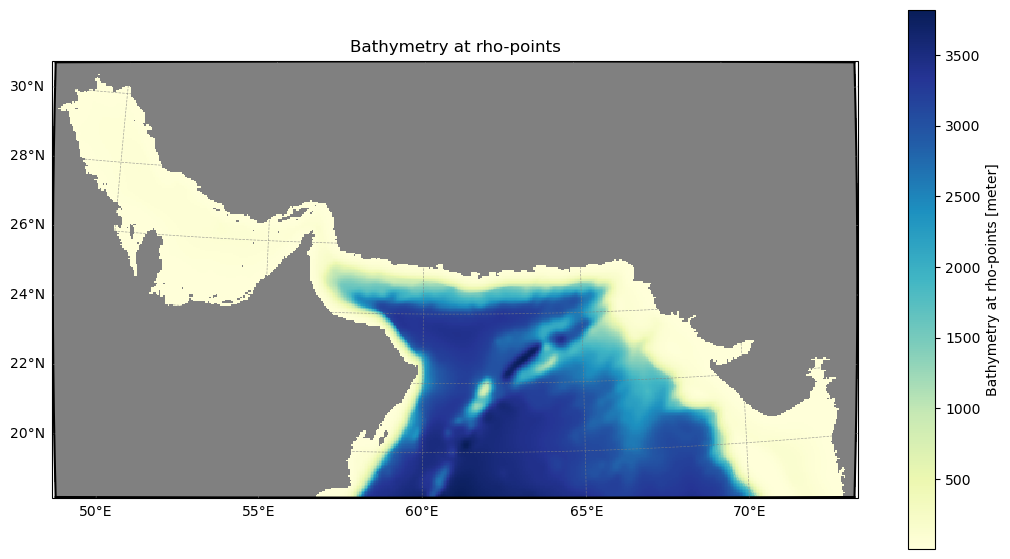

In [ ]:
grid_name = "persian-gulf-5km"
model_name = "cson_roms-marbl_v0.1"
description = "Persian Gulf"
start_time = datetime(2012, 1, 1)
end_time = datetime(2012, 1, 2)

grid_kwargs = dict[str, float](
    nx=520,
    ny=280,
    size_x=2600,
    size_y=1400,
    center_lon=61,
    center_lat=25,
    rot=0,
    N=50,  # number of vertical levels
    theta_s=5.0,  # surface control parameter
    theta_b=2.0,  # bottom control parameter
    hc=250.0,  # critical depth
)

boundaries={
        "south": False,
        "east": True,
        "north": True,
        "west": False, 
    }

partitioning = {
    "n_procs_x": 1, # number of partitions in xi (x) 
    "n_procs_y": 1, # number of partitions in eta (y) 
}


## Initialize CstarSpecBuilder

Create a `CstarSpecBuilder` instance with the domain configuration. This initializes the PRECONFIG stage, creating the grid object and blueprint structure.


In [ ]:
ocn = cson_forge.CstarSpecBuilder(
    description=description,
    model_name=model_name,
    grid_name=grid_name,
    grid_kwargs=grid_kwargs,
    open_boundaries=boundaries,    
    start_time=start_time,
    end_time=end_time,
    partitioning=partitioning,
)


### Visualize the grid

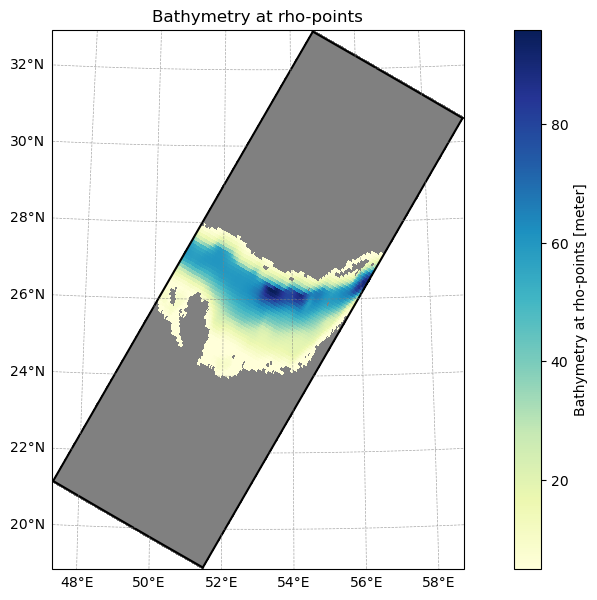

In [17]:
ocn.grid.plot()

## Prepare Source Data

Ensure that all required source datasets (GLORYS, UNIFIED, SRTM15, etc.) are staged locally. This downloads and prepares the data needed for input generation.


In [6]:
# ensure that source data is staged locally
ocn.ensure_source_data()


✔️  Using existing GLORYS_REGIONAL file for 2012-01-01: cmems_mod_glo_phy_my_0.083deg_P1D-m_REGIONAL_test-tiny_20120101.nc
✔️  Using existing GLORYS_REGIONAL file for 2012-01-02: cmems_mod_glo_phy_my_0.083deg_P1D-m_REGIONAL_test-tiny_20120102.nc
✔️  TPXO dataset verified at: /Users/mclong/cson-forge-data/source-data/TPXO/TPXO10.v2
✔️  Using existing BGC dataset: /Users/mclong/cson-forge-data/source-data/UNIFIED_BGC/BGCdataset.nc


## Generate Input Files

Generate all model input files (grid, initial conditions, forcing) from the source data. This completes the POSTCONFIG stage and updates the blueprint with actual file paths.

The system will look for an existing blueprint and, if a match is found, it will use that data unless the user sets `clobber=True` to force re-generating the data. 


In [7]:
# prepare model input
ocn.generate_inputs(clobber=True) # setting clobber=True will overwrite existing files


⚠️  Clobber=True: removing 8 existing .nc files in /Users/mclong/cson-forge-data/input-data/cson_roms-marbl_v0.1_test-tiny_1procs...

▶️  [1/8] Writing ROMS grid...

▶️  [2/8] Generating initial conditions...


[WARNING] Optional variables missing (but not critical): ['Lig', 'DIC_ALT_CO2', 'Alk_ALT_CO2']


[########################################] | 100% Completed | 3.97 sms

▶️  [3/8] Generating surface forcing...


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


[########################################] | 100% Completed | 19.63 ss


[WARNING] Optional variables missing (but not critical): ['pco2_air_alt']



▶️  [4/8] Generating surface forcing...
[########################################] | 100% Completed | 106.75 ms

▶️  [5/8] Generating boundary forcing...
[########################################] | 100% Completed | 206.15 ms


[WARNING] Optional variables missing (but not critical): ['Lig', 'DIC_ALT_CO2', 'Alk_ALT_CO2']



▶️  [6/8] Generating boundary forcing...
[########################################] | 100% Completed | 8.93 ss

▶️  [7/8] Generating tidal forcing...
[########################################] | 100% Completed | 1.37 sms

▶️  [8/8] Generating river forcing...

✅ All input files generated.



RomsMarblBlueprint(name='cson_roms-marbl_v0.1_test-tiny_1procs', description='Test tiny', application=<Application.ROMS_MARBL: 'roms_marbl'>, state=<BlueprintState.NotSet: 'notset'>, valid_start_date=datetime.datetime(2012, 1, 1, 0, 0), valid_end_date=datetime.datetime(2012, 1, 2, 0, 0), code={'roms': {'documentation': '', 'locked': False, 'location': 'https://github.com/CWorthy-ocean/ucla-roms.git', 'commit': '84f4ee7886e9ee4c33b3248b35c955551f3b9c06', 'branch': '', 'filter': None}, 'run_time': {'documentation': '', 'locked': False, 'location': 'placeholder://run_time', 'commit': '', 'branch': 'main', 'filter': None}, 'compile_time': {'documentation': '', 'locked': False, 'location': 'placeholder://compile_time', 'commit': '', 'branch': 'main', 'filter': None}, 'marbl': {'documentation': '', 'locked': False, 'location': 'https://github.com/marbl-ecosys/MARBL.git', 'commit': 'marbl0.45.0', 'branch': '', 'filter': None}}, initial_conditions={'documentation': '', 'locked': False, 'data':

## Access Generated Input Datasets

Input datasets are available on the `datasets` attribute of the `CstarSpecBuilder` after `generate_inputs()` has completed. The `datasets` dictionary only contains keys for fields that exist in the blueprint and have been successfully generated.

**Note:** Datasets are only available after `generate_inputs()` has run and populated the blueprint with actual file paths. If a key doesn't exist, it means that field wasn't generated or isn't in the blueprint.

In [8]:
for key in ocn.datasets.keys():
    print("-"*100)
    print(key)
    print(ocn.datasets[key])

----------------------------------------------------------------------------------------------------
grid
<xarray.Dataset> Size: 3kB
Dimensions:       (eta_rho: 4, xi_rho: 8, xi_u: 7, eta_v: 3, eta_coarse: 3,
                   xi_coarse: 5, s_rho: 3, s_w: 4)
Coordinates:
    lat_rho       (eta_rho, xi_rho) float64 256B ...
    lon_rho       (eta_rho, xi_rho) float64 256B ...
    lat_u         (eta_rho, xi_u) float64 224B ...
    lon_u         (eta_rho, xi_u) float64 224B ...
    lat_v         (eta_v, xi_rho) float64 192B ...
    lon_v         (eta_v, xi_rho) float64 192B ...
    lat_coarse    (eta_coarse, xi_coarse) float64 120B ...
    lon_coarse    (eta_coarse, xi_coarse) float64 120B ...
Dimensions without coordinates: eta_rho, xi_rho, xi_u, eta_v, eta_coarse,
                                xi_coarse, s_rho, s_w
Data variables: (12/15)
    angle         (eta_rho, xi_rho) float64 256B ...
    f             (eta_rho, xi_rho) float64 256B ...
    pm            (eta_rho, xi_rho) float

## Configure Build

Render the Jinja2 templates to generate compile-time and run-time configuration files (`.opt` files, `roms.in`, etc.). This prepares the BUILD stage.


In [9]:
# configure and build the model
ocn.configure_build(compile_time_settings={}, run_time_settings={})


ROMSSimulation(
name = cson_roms-marbl_v0.1_test-tiny_1procs,
directory = /Users/mclong/cson-forge-data/cson-forge-run/cson_roms-marbl_v0.1_test-tiny_1procs_20120101-20120102,
start_date = 2012-01-01 00:00:00,
end_date = 2012-01-02 00:00:00,
valid_start_date = 2012-01-01 00:00:00,
valid_end_date = 2012-01-02 00:00:00,
discretization = ROMSDiscretization(time_step = 1800, n_procs_x = 1, n_procs_y = 1),
codebase = <ROMSExternalCodeBase instance>,
runtime_code = <AdditionalCode instance>,
compile_time_code = <AdditionalCode instance>
model_grid = <ROMSModelGrid instance>,
initial_conditions = <ROMSInitialConditions instance>,
tidal_forcing = <ROMSTidalForcing instance>,
river_forcing = <ROMSRiverForcing instance>,
surface_forcing = <list of 2 ROMSSurfaceForcing instances>,
boundary_forcing = <list of 2 ROMSBoundaryForcing instances>,
)

## Build Model Executable

Compile the ROMS/MARBL model source code to create the executable. This uses the C-Star build system to compile the model with the specified configuration.


In [10]:
ocn.build()


[INFO] 🛠️ Configuring ROMSSimulation
[INFO] 🔧 Setting up ROMSExternalCodeBase...
[INFO] 🔧 Setting up MARBLExternalCodeBase...
[INFO] 📦 Fetching compile-time code...
[INFO] 📦 Fetching runtime code... 
[INFO] 📦 Fetching input datasets...


ROMSSimulation(
name = cson_roms-marbl_v0.1_test-tiny_1procs,
directory = /Users/mclong/cson-forge-data/cson-forge-run/cson_roms-marbl_v0.1_test-tiny_1procs_20120101-20120102,
start_date = 2012-01-01 00:00:00,
end_date = 2012-01-02 00:00:00,
valid_start_date = 2012-01-01 00:00:00,
valid_end_date = 2012-01-02 00:00:00,
discretization = ROMSDiscretization(time_step = 1800, n_procs_x = 1, n_procs_y = 1),
codebase = <ROMSExternalCodeBase instance>,
runtime_code = <AdditionalCode instance>,
compile_time_code = <AdditionalCode instance>
model_grid = <ROMSModelGrid instance>,
initial_conditions = <ROMSInitialConditions instance>,
tidal_forcing = <ROMSTidalForcing instance>,
river_forcing = <ROMSRiverForcing instance>,
surface_forcing = <list of 2 ROMSSurfaceForcing instances>,
boundary_forcing = <list of 2 ROMSBoundaryForcing instances>,
)

## Pre-Run Setup

Perform pre-run operations, including partitioning input files for parallel execution if needed.


In [11]:
# perform partitioning
ocn.pre_run()


[INFO] Partitioning /Users/mclong/cson-forge-data/cson-forge-run/cson_roms-marbl_v0.1_test-tiny_1procs_20120101-20120102/input_datasets/cson_roms-marbl_v0.1_test-tiny_1procs_grid.nc into (1,1)
[INFO] Partitioning /Users/mclong/cson-forge-data/cson-forge-run/cson_roms-marbl_v0.1_test-tiny_1procs_20120101-20120102/input_datasets/cson_roms-marbl_v0.1_test-tiny_1procs_initial_conditions.nc into (1,1)
[INFO] Partitioning /Users/mclong/cson-forge-data/cson-forge-run/cson_roms-marbl_v0.1_test-tiny_1procs_20120101-20120102/input_datasets/cson_roms-marbl_v0.1_test-tiny_1procs_tidal.nc into (1,1)
[INFO] Partitioning /Users/mclong/cson-forge-data/cson-forge-run/cson_roms-marbl_v0.1_test-tiny_1procs_20120101-20120102/input_datasets/cson_roms-marbl_v0.1_test-tiny_1procs_river.nc into (1,1)
[INFO] Partitioning /Users/mclong/cson-forge-data/cson-forge-run/cson_roms-marbl_v0.1_test-tiny_1procs_20120101-20120102/input_datasets/cson_roms-marbl_v0.1_test-tiny_1procs_boundary-physics_201201.nc into (1,1)


## Run Model Simulation

Execute the ROMS model simulation. This runs the model with the configured inputs and settings.


In [12]:
# run the model
exec_handler = ocn.run()
print(exec_handler)


[INFO] Running mpirun -n 1 /Users/mclong/cson-forge-data/cson-forge-run/cson_roms-marbl_v0.1_test-tiny_1procs_20120101-20120102/compile_time_code/roms /Users/mclong/cson-forge-data/cson-forge-run/cson_roms-marbl_v0.1_test-tiny_1procs_20120101-20120102/runtime_code/cson_roms-marbl_v0.1_test-tiny_1procs.in
LocalProcess
------------
Commands: mpirun -n 1 /Users/mclong/cson-forge-data/cson-forge-run/cson_roms-marbl_v0.1_test-tiny_1procs_20120101-20120102/compile_time_code/roms /Users/mclong/cson-forge-data/cson-forge-run/cson_roms-marbl_v0.1_test-tiny_1procs_20120101-20120102/runtime_code/cson_roms-marbl_v0.1_test-tiny_1procs.in
Run path: /Users/mclong/cson-forge-data/cson-forge-run/cson_roms-marbl_v0.1_test-tiny_1procs_20120101-20120102/output
Output file: /Users/mclong/cson-forge-data/cson-forge-run/cson_roms-marbl_v0.1_test-tiny_1procs_20120101-20120102/logs/cson_roms-marbl_v0-1_test-tiny_1procs_20120101-20120102.out
Status: running


In [13]:
%%time

while not handler.ExecutionStatus.is_terminal(exec_handler.status):
    print("...", end="", flush=True)
    time.sleep(30)

if exec_handler.status == handler.ExecutionStatus.COMPLETED:
    print()
    print("Completed")
    ocn.post_run()
else:
    raise Exception("Model run failed")

...
Completed
[INFO] Joining netCDF files output_bgc_dia.20120101000000.*.nc...
[INFO] Joining netCDF files output_bgc.20120101000000.*.nc...
[INFO] Joining netCDF files output_rst.20120102000000.*.nc...
[INFO] Joining netCDF files output_rst.20120101120000.*.nc...


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


[INFO] done spatially joining /Users/mclong/cson-forge-data/cson-forge-run/cson_roms-marbl_v0.1_test-tiny_1procs_20120101-20120102/output/output_bgc.20120101000000.nc
[INFO] Joining netCDF files output_his.20120101000000.*.nc...
[INFO] done spatially joining /Users/mclong/cson-forge-data/cson-forge-run/cson_roms-marbl_v0.1_test-tiny_1procs_20120101-20120102/output/output_rst.20120102000000.nc
[INFO] done spatially joining /Users/mclong/cson-forge-data/cson-forge-run/cson_roms-marbl_v0.1_test-tiny_1procs_20120101-20120102/output/output_rst.20120101120000.nc
[INFO] done spatially joining /Users/mclong/cson-forge-data/cson-forge-run/cson_roms-marbl_v0.1_test-tiny_1procs_20120101-20120102/output/output_his.20120101000000.nc


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


[INFO] done spatially joining /Users/mclong/cson-forge-data/cson-forge-run/cson_roms-marbl_v0.1_test-tiny_1procs_20120101-20120102/output/output_bgc_dia.20120101000000.nc
CPU times: user 14.7 ms, sys: 127 ms, total: 141 ms
Wall time: 31 s


## Visualize Model Output

After the model run completes, you can load and visualize the output data. The code below:

1. **Finds output files**: Uses `glob` to locate all BGC (biogeochemical) output files in the `JOINED_OUTPUT` directory
2. **Opens the dataset**: Uses `xarray.open_mfdataset()` to open multiple NetCDF files as a single dataset
3. **Applies land mask**: Masks out land points using the grid's `mask_rho` variable
4. **Plots a variable**: Creates a plot of dissolved inorganic carbon (DIC) at the first time step and bottom vertical level (`s_rho=-1`)

The `JOINED_OUTPUT` directory contains the spatially-joined output files created by `post_run()`, which combine partitioned output files from parallel runs into single files.

In [14]:
str(ocn.run_output_dir / "output" / "joined_output" / (ocn.casename + "_bgc.*"))

'/Users/mclong/cson-forge-data/cson-forge-run/cson_roms-marbl_v0.1_test-tiny_1procs_20120101-20120102/output/joined_output/cson_roms-marbl_v0.1_test-tiny_1procs_20120101-20120102_bgc.*'

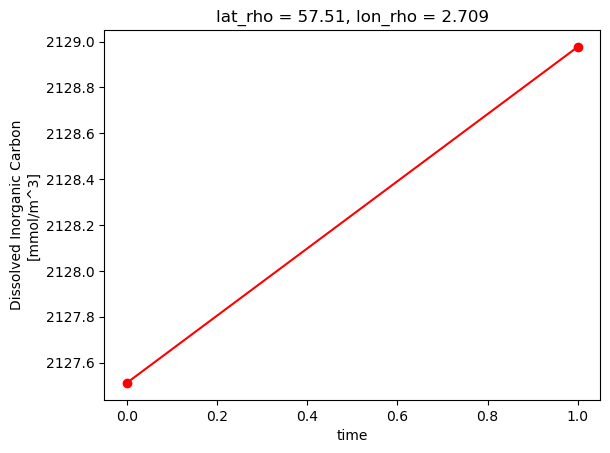

In [24]:
import xarray as xr
from glob import glob

files = glob(str(ocn.run_output_dir / "output" / ("output_bgc.*")))
ds = xr.open_mfdataset(files)
ds = ds.where(ocn.grid.ds.mask_rho)
ds.DIC.isel(eta_rho=2, xi_rho=6, s_rho=-1).plot(marker="o", color="red")

## Set Blueprint State

The `set_blueprint_state()` method updates the state of the blueprint, which tracks the workflow stage of the simulation specification. Blueprint states indicate the current stage of the workflow (e.g., "draft", "configured", "ready") and are used by the C-Star orchestration system to manage the simulation lifecycle.

Common blueprint states include:
- `"draft"`: The blueprint is in development and not yet finalized
- `"validated"`: The blueprint has been validated

Setting the state to `"draft"` is useful when you want to mark the blueprint as a work-in-progress that may need further modifications before execution.

In [16]:
ocn.set_blueprint_state(state="draft")

## Save Executed Notebook

Save a timestamped copy of this notebook to `executed/forge/{os}/` for reproducibility and record-keeping. The copy is organized by operating system (macOS or Ubuntu/Linux) to track execution history across different platforms.

The saved notebook includes all executed cells and outputs, providing a complete record of the simulation workflow for future reference.

In [17]:
# Save the notebook copy
cson_forge.save_notebook_copy(notebook_name="CStarSpecBuilder-demo.ipynb")

Notebook copy saved to: executed/forge/MacOS/CStarSpecBuilder-demo_MacOS.ipynb


PosixPath('executed/forge/MacOS/CStarSpecBuilder-demo_MacOS.ipynb')